In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### EDA

#### 1. Distribution for Numeric Columns

<Axes: xlabel='Age', ylabel='Count'>

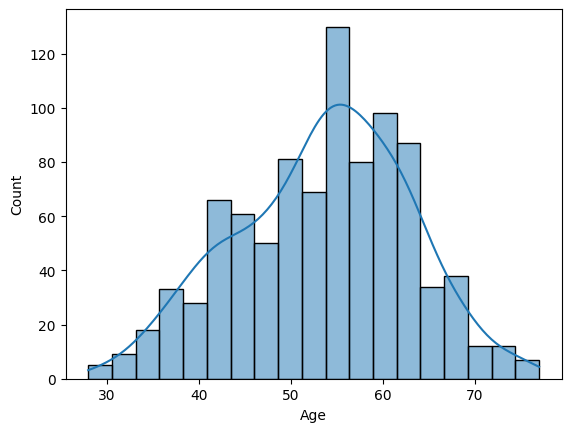

In [3]:
sns.histplot(df['Age'], kde = True)

<Axes: xlabel='RestingBP', ylabel='Count'>

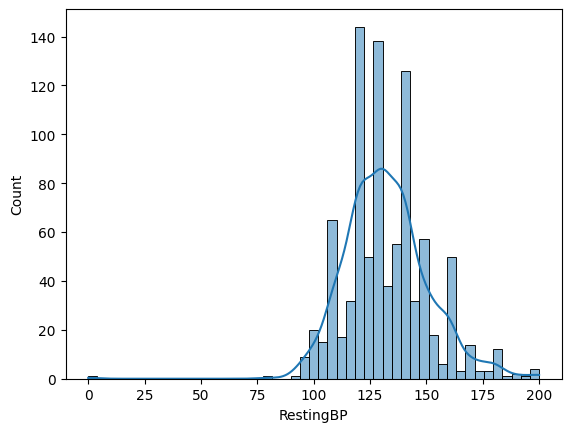

In [4]:
sns.histplot(df['RestingBP'], kde = True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

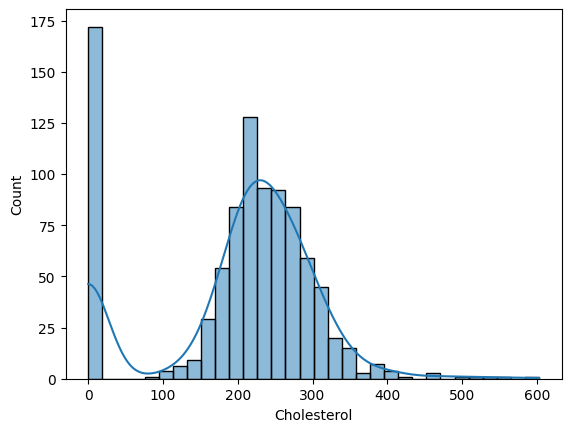

In [5]:
sns.histplot(df['Cholesterol'], kde = True)

<Axes: xlabel='MaxHR', ylabel='Count'>

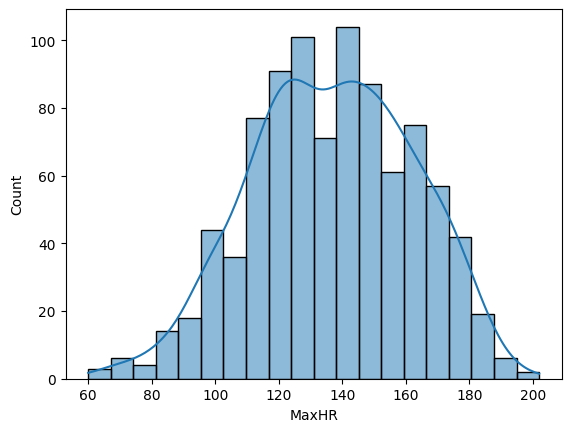

In [6]:
sns.histplot(df['MaxHR'], kde = True)

#### 2. Pie Chart Distribution for Categoric Columns

<Axes: >

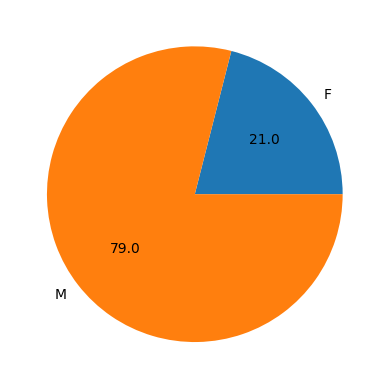

In [7]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

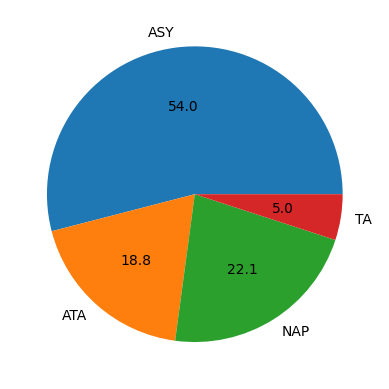

In [8]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

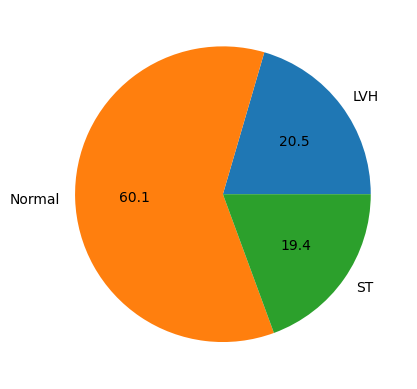

In [9]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

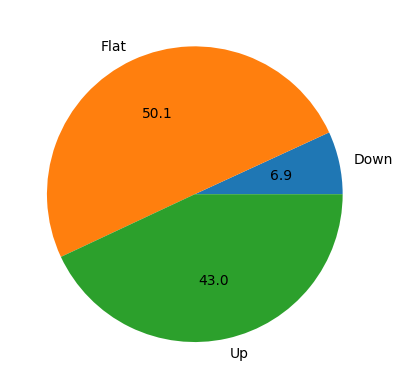

In [10]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

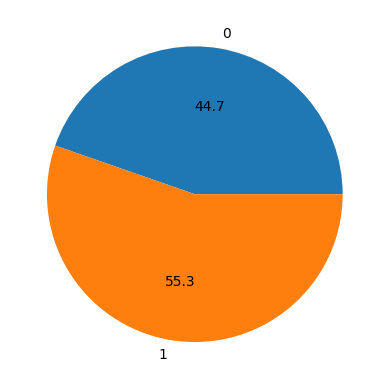

In [11]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f')

### Violin Plot

<Axes: xlabel='HeartDisease', ylabel='Sex'>

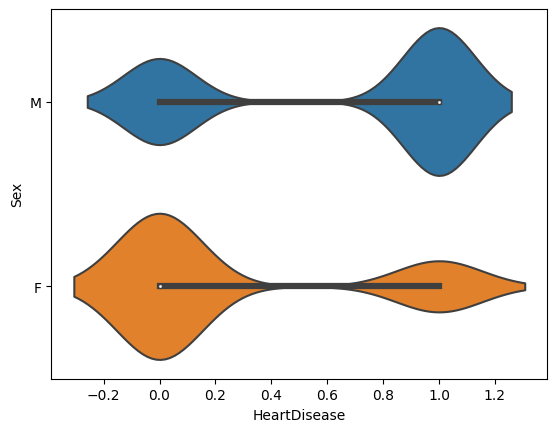

In [12]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

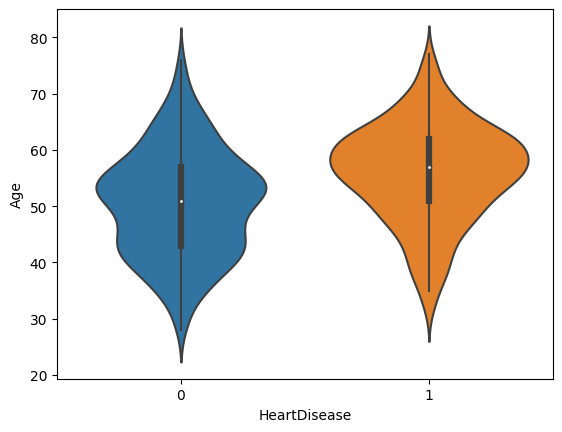

In [13]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

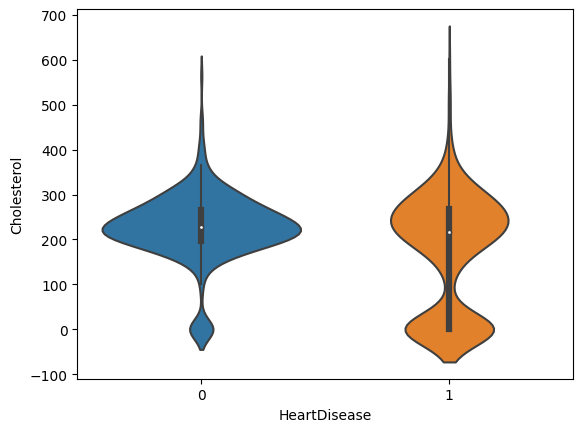

In [14]:
sns.violinplot(y = df['Cholesterol'], x = df['HeartDisease'])

### Correlation

In [15]:
d = df.select_dtypes(include=['number']) 
cor = d.corr()
cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### 1. Heatmap

<Axes: >

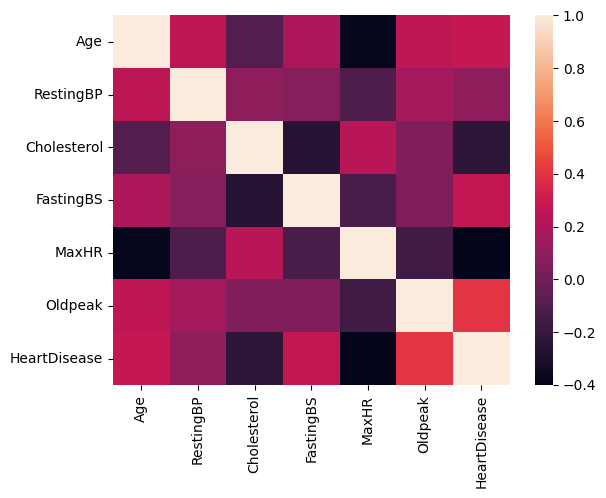

In [16]:
sns.heatmap(cor)

### 2. JointPlot

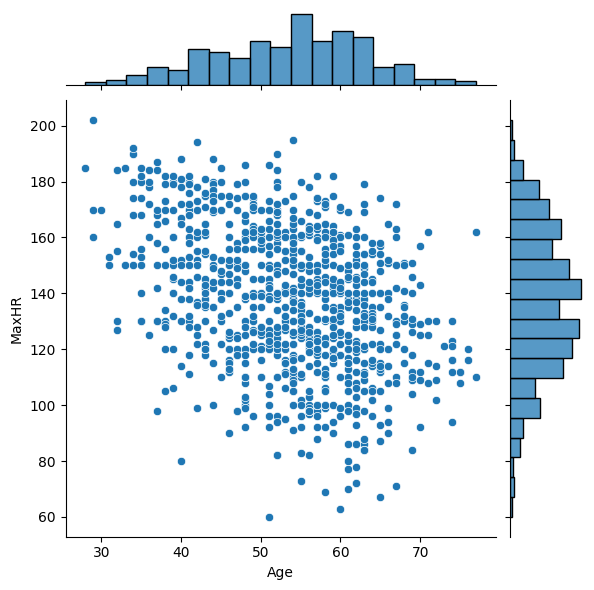

In [17]:
sns.jointplot(x = 'Age', y = 'MaxHR', data = df)

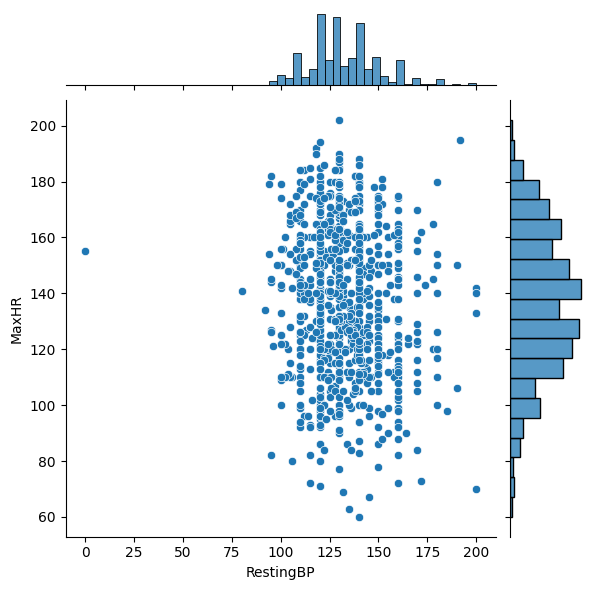

In [18]:
sns.jointplot(x = 'RestingBP', y = 'MaxHR', data = df)

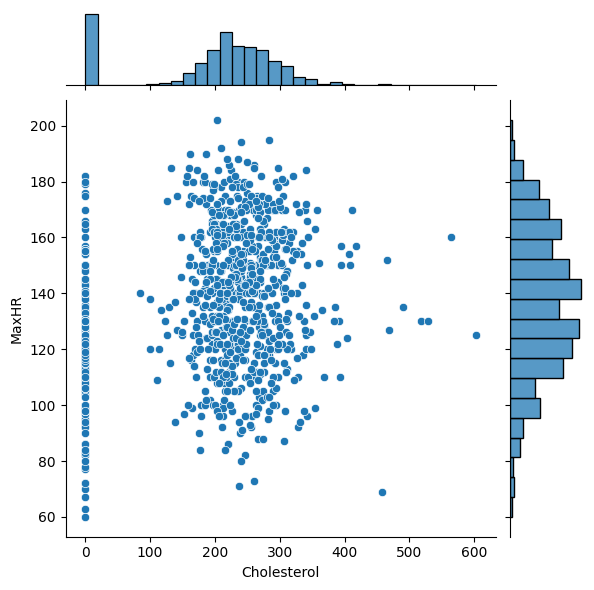

In [19]:
sns.jointplot(x = 'Cholesterol', y = 'MaxHR', data = df)

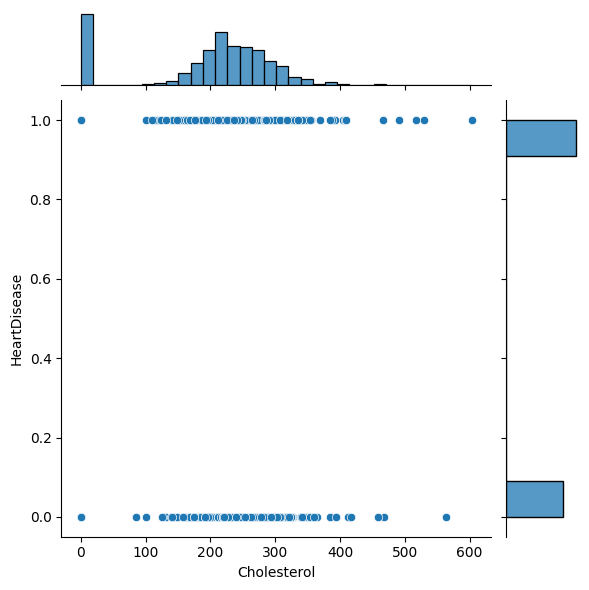

In [20]:
sns.jointplot(x = 'Cholesterol', y = 'HeartDisease', data = df)

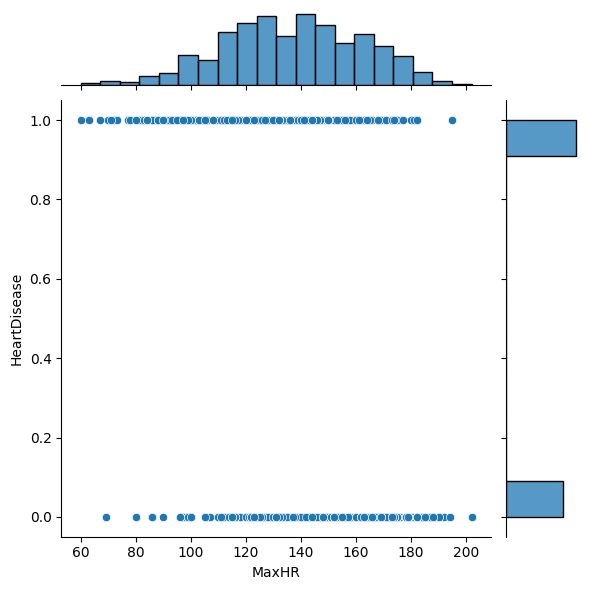

In [21]:
sns.jointplot(x = 'MaxHR', y = 'HeartDisease', data = df)

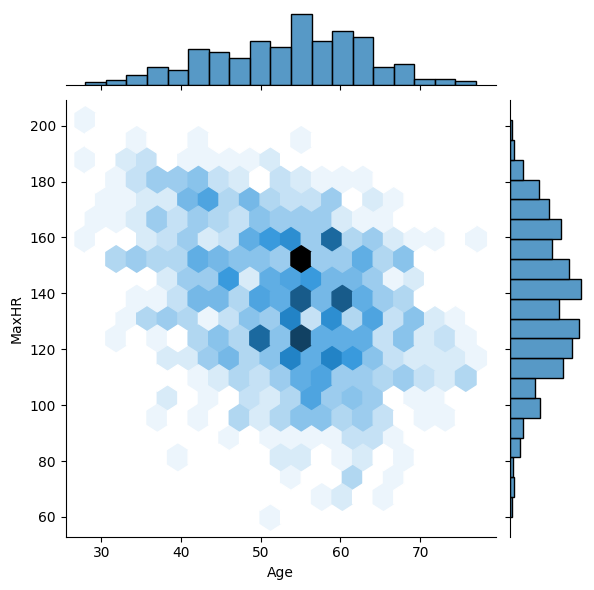

In [22]:
sns.jointplot(x = 'Age', y = 'MaxHR',kind = 'hex', data = df)

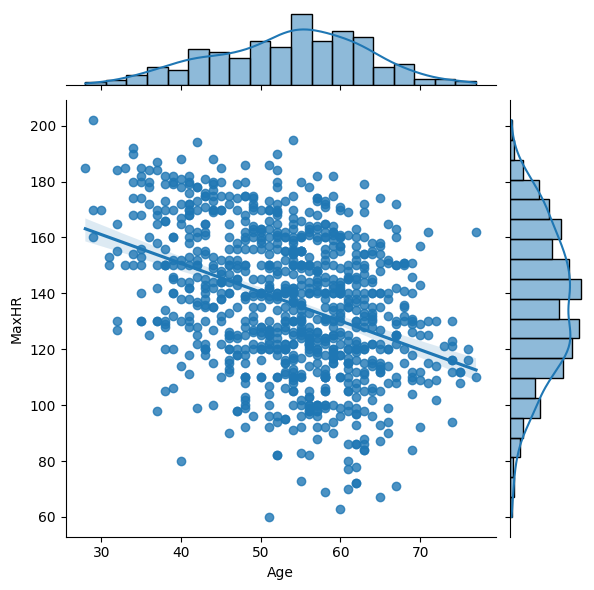

In [23]:
sns.jointplot(x = 'Age', y = 'MaxHR',kind = 'reg', data = df)

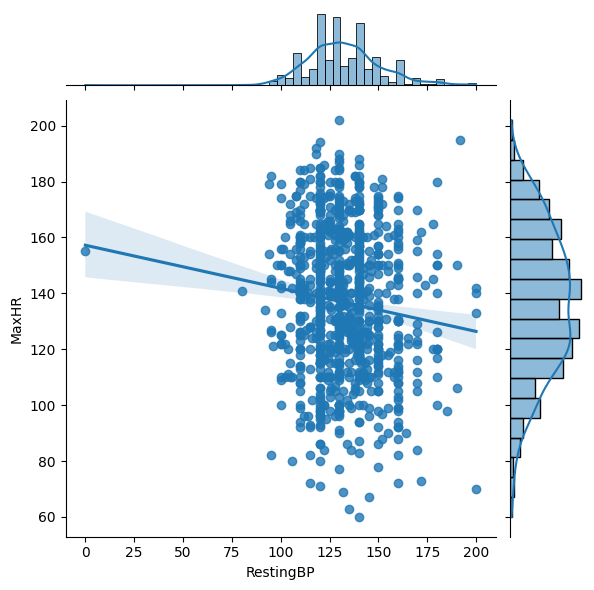

In [24]:
sns.jointplot(x = 'RestingBP', y = 'MaxHR',kind = 'reg', data = df)

### 3. Pair Plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


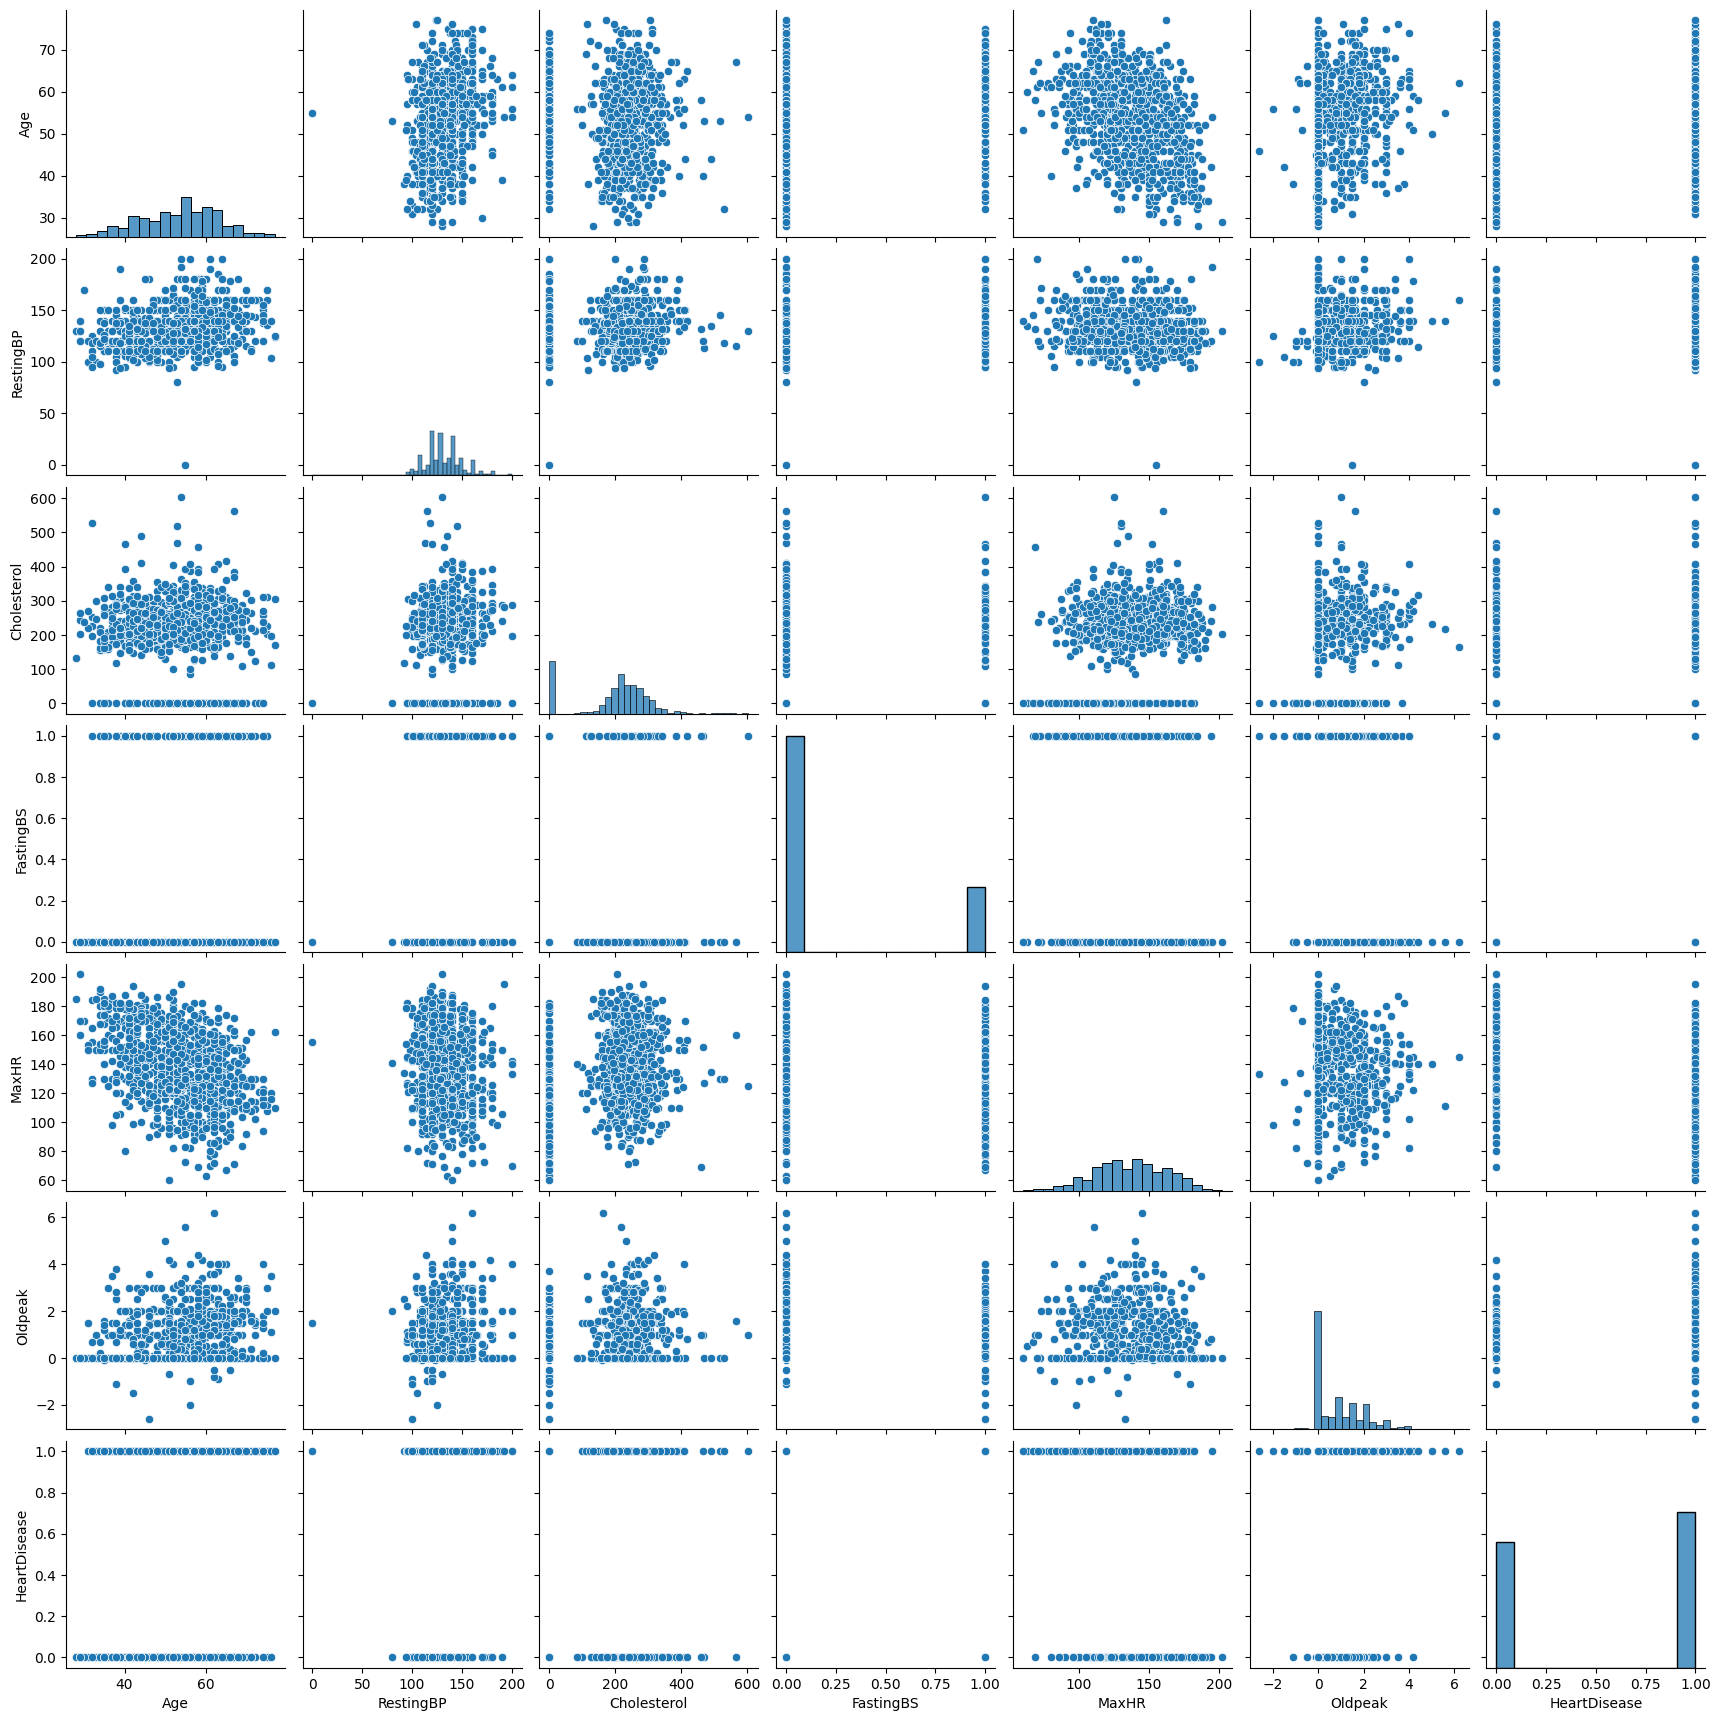

In [25]:
sns.pairplot(df)